In [2]:
using ComputationalHeatTransfer

┌ Info: Precompiling ComputationalHeatTransfer [5fc296c8-2eb5-40dc-a46d-98a68011a900]
└ @ Base loading.jl:1317


In [3]:
using Plots
using LaTeXStrings

Note: All temperatures here represent $T - T_0$, where $T_0$ is the undisturbed temperature of the plate. 

### Physical parameters

In [4]:
ρ = 1;
c = 1;
k = 0.1;
d = 0.1;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(1.0, 1.0, 0.1, 0.1, 0.1)

In [36]:
xlim = (-2.1,2.1)
ylim = (-2.1,2.1)
Δx, Δt = setstepsizes(params.α,gridPe=0.4,fourier=2.0)

(0.04000000000000001, 0.0032000000000000015)

### Set up the boundary of the domain

In [37]:
#bdry = Circle(2.0,1.5Δx)
bdry = Rectangle(2.0,2.0,1.5Δx)

Square body with 260 points and side half-length 2.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


### Set up the evaporator and condenser

In [38]:
#eb = Circle(1.0,1.5*Δx)
eb = Rectangle(0.5,1.0,1.5*Δx)
Te = RigidTransform((0.0,0.0),0.0)
Te(eb)
cb1 = Rectangle(0.5,1.0,1.5*Δx)
cb2 = Rectangle(0.5,1.0,1.5*Δx)
Tc1 = RigidTransform((1.0,0.0),0.0)
Tc2 = RigidTransform((-1.0,0.0),0.0)

Tc1(cb1)
Tc2(cb2)


qe = 5.0
hc = 10.0
Tc = -10.0

eparams = PrescribedHeatFluxRegion(qe,eb);
cparams1 = PrescribedHeatModelRegion(hc,Tc,cb1);
cparams2 = PrescribedHeatModelRegion(hc,Tc,cb2);

### Create the system

In [39]:
sys = HeatConduction(params,Δx,xlim,ylim,Δt,bodies=BodyList([bdry]),qflux=eparams,bctype=ComputationalHeatTransfer.AdiabaticBC,qmodel=[cparams1,cparams2])
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Internal problem Heat conduction system on a grid of size 108 x 108 and 260 static immersed points
   1 body


#### Initialize state, and create the integrator

In [40]:
u0 = newstate(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Primal nodes in a (nx = 108, ny = 108) cell grid of type Float64 data
  Number of Primal nodes: (nx = 107, ny = 107), Float64[])

### Advance the solution

In [45]:
step!(integrator,2.0)

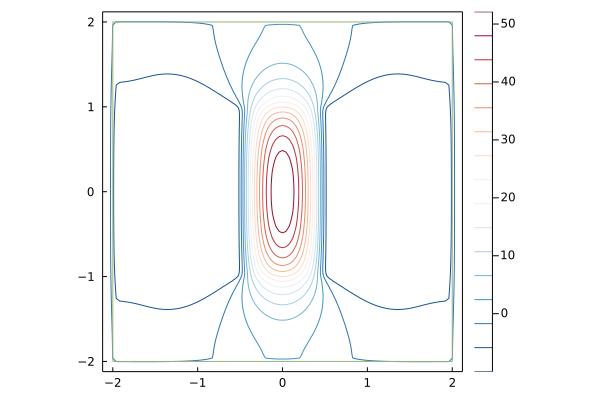

In [46]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(bdry,fillalpha=0.0)

In [47]:
xc, yc = coordinates(temperature(integrator),sys.grid);

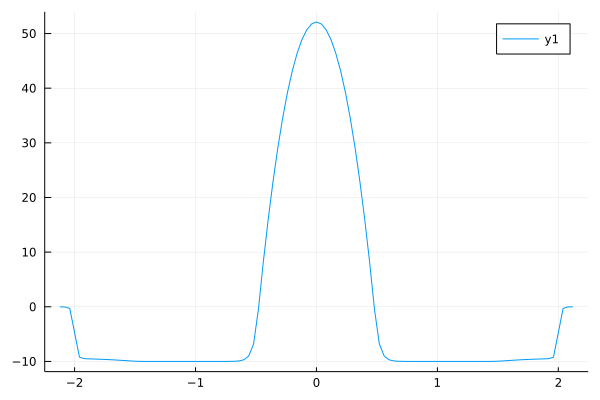

In [53]:
plot(xc,temperature(integrator)[:,floor(Int,size(sys.grid,2)/2)])